In [3]:
import quandl
quandl.ApiConfig.api_key = "AkvsAjUV5KnZahNpFyMw"
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
prices = quandl.get_table('SHARADAR/SEP', ticker=['AAPL', 'KO', 'NKE', 'TSLA', 'XOM'], date={'gte':'2017-01-01', 'lte':'2018-12-31'}, paginate=True)
prices

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
None,,,,,,,,,,
0,XOM,2018-12-31,68.320,69.145,67.660,68.190,15807007.0,0.0,68.19,2020-05-01
1,XOM,2018-12-28,69.180,69.580,67.820,68.170,19706697.0,0.0,68.17,2020-05-01
2,XOM,2018-12-27,67.740,68.940,66.080,68.940,22077044.0,0.0,68.94,2020-05-01
3,XOM,2018-12-26,66.180,68.655,64.650,68.640,24887738.0,0.0,68.64,2020-05-01
4,XOM,2018-12-24,66.870,67.530,65.440,65.510,14262825.0,0.0,65.51,2020-05-01
...,...,...,...,...,...,...,...,...,...,...
405,AAPL,2018-09-10,55.237,55.462,54.117,54.583,158065812.0,0.0,218.33,2020-08-31
406,AAPL,2018-09-07,55.462,56.343,55.178,55.325,150479240.0,0.0,221.30,2020-08-31
407,AAPL,2018-09-06,56.557,56.837,55.325,55.775,137159904.0,0.0,223.10,2020-08-31


In [5]:
pivoted = prices.pivot(index = 'date', columns = 'ticker', values = 'close')
pivoted

ticker,AAPL,KO,NKE,TSLA,XOM
date,,,,,
2018-09-04,57.090,44.76,79.60,57.790,80.29
2018-09-05,56.718,45.38,79.92,56.148,81.36
2018-09-06,55.775,45.77,80.40,56.190,80.46
2018-09-07,55.325,45.72,80.30,52.648,81.83
2018-09-10,54.583,46.06,82.10,57.100,81.71
...,...,...,...,...,...
2018-12-24,36.708,45.96,68.10,59.078,65.51
2018-12-26,39.292,46.94,73.01,65.218,68.64
2018-12-27,39.038,47.53,73.67,63.226,68.94


In [6]:
pivoted.pct_change()

ticker,AAPL,KO,NKE,TSLA,XOM
date,,,,,
2018-09-04,NaN,NaN,NaN,NaN,NaN
2018-09-05,-0.006516,0.013852,0.004020,-0.028413,0.013327
2018-09-06,-0.016626,0.008594,0.006006,0.000748,-0.011062
2018-09-07,-0.008068,-0.001092,-0.001244,-0.063036,0.017027
2018-09-10,-0.013412,0.007437,0.022416,0.084562,-0.001466
...,...,...,...,...,...
2018-12-24,-0.025848,-0.033845,-0.059002,-0.076242,-0.038315
2018-12-26,0.070393,0.021323,0.072100,0.103930,0.047779
2018-12-27,-0.006464,0.012569,0.009040,-0.030544,0.004371


In [7]:
aapl = pivoted['AAPL'].pct_change().apply(lambda x: (np.log(1+x)))
aapl.head()

date
2018-09-04         NaN
2018-09-05   -0.006537
2018-09-06   -0.016766
2018-09-07   -0.008101
2018-09-10   -0.013502
Name: AAPL, dtype: float64

### Variance
$$s^2 = \frac{\sum_{i=1}^N (x_i - \bar{x})^2}{N-1}$$
Standard Deviation (Volatility)
$$s = \sqrt{\frac{\sum_{i=1}^N (x_i - \bar{x})^2}{N-1}}$$

In [8]:
mean_aapl = aapl.sum()/aapl.count()
mean_aapl

-0.004567595347237204

In [9]:
var = aapl.apply(lambda x: (x- mean_aapl)**2)
var

date
2018-09-04         NaN
2018-09-05    0.000004
2018-09-06    0.000149
2018-09-07    0.000012
2018-09-10    0.000080
                ...   
2018-12-24    0.000467
2018-12-26    0.005270
2018-12-27    0.000004
2018-12-28    0.000026
2018-12-31    0.000202
Name: AAPL, Length: 82, dtype: float64

In [10]:
var_aapl = var.sum()/(aapl.count() - 1)
var_aapl

0.000552790333627004

In [11]:
aapl.var()

0.0005527903336270039

### std 

In [12]:
st_aapl_d = np.sqrt(var_aapl)
st_aapl_d

0.023511493649426105

In [13]:
annual = aapl.std() * np.sqrt(250)
annual

0.3717493556238544

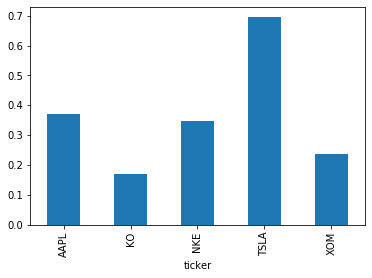

In [14]:
pivoted.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind = 'bar')

### Covariance
$$\sigma_{ij} = \frac{\sum_{i=1j=1}^N (x_i - \bar{x_i})(x_j - \bar{x_j})}{N-1}$$

In [15]:
df = pivoted.pct_change()
df.head()

ticker,AAPL,KO,NKE,TSLA,XOM
date,,,,,
2018-09-04,NaN,NaN,NaN,NaN,NaN
2018-09-05,-0.006516,0.013852,0.004020,-0.028413,0.013327
2018-09-06,-0.016626,0.008594,0.006006,0.000748,-0.011062
2018-09-07,-0.008068,-0.001092,-0.001244,-0.063036,0.017027
2018-09-10,-0.013412,0.007437,0.022416,0.084562,-0.001466


In [16]:
mean_AAPL = df['AAPL'].mean()
mean_TSLA = df['TSLA'].mean()
mean_AAPL

-0.004285484081956768

In [17]:
df['dif_AAPL'] = df['AAPL'] - mean_AAPL
df['dif_TSLA'] = df['TSLA'] - mean_TSLA
df

ticker,AAPL,KO,NKE,TSLA,XOM,dif_AAPL,dif_TSLA
date,,,,,,,
2018-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-05,-0.006516,0.013852,0.004020,-0.028413,0.013327,-0.002231,-0.031120
2018-09-06,-0.016626,0.008594,0.006006,0.000748,-0.011062,-0.012341,-0.001959
2018-09-07,-0.008068,-0.001092,-0.001244,-0.063036,0.017027,-0.003783,-0.065743
2018-09-10,-0.013412,0.007437,0.022416,0.084562,-0.001466,-0.009126,0.081855
...,...,...,...,...,...,...,...
2018-12-24,-0.025848,-0.033845,-0.059002,-0.076242,-0.038315,-0.021562,-0.078949
2018-12-26,0.070393,0.021323,0.072100,0.103930,0.047779,0.074679,0.101224
2018-12-27,-0.006464,0.012569,0.009040,-0.030544,0.004371,-0.002179,-0.033250


In [18]:
df['COV_TSLA_AAPL'] = (df['dif_AAPL'] * df['dif_TSLA'])/(df['AAPL'].count() - 1)
df

ticker,AAPL,KO,NKE,TSLA,XOM,dif_AAPL,dif_TSLA,COV_TSLA_AAPL
date,,,,,,,,
2018-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-05,-0.006516,0.013852,0.004020,-0.028413,0.013327,-0.002231,-0.031120,8.676791e-07
2018-09-06,-0.016626,0.008594,0.006006,0.000748,-0.011062,-0.012341,-0.001959,3.021412e-07
2018-09-07,-0.008068,-0.001092,-0.001244,-0.063036,0.017027,-0.003783,-0.065743,3.108524e-06
2018-09-10,-0.013412,0.007437,0.022416,0.084562,-0.001466,-0.009126,0.081855,-9.337778e-06
...,...,...,...,...,...,...,...,...
2018-12-24,-0.025848,-0.033845,-0.059002,-0.076242,-0.038315,-0.021562,-0.078949,2.127912e-05
2018-12-26,0.070393,0.021323,0.072100,0.103930,0.047779,0.074679,0.101224,9.449088e-05
2018-12-27,-0.006464,0.012569,0.009040,-0.030544,0.004371,-0.002179,-0.033250,9.056316e-07


In [19]:
df['COV_TSLA_AAPL'].sum()

0.0003596036994998219

In [20]:
df['AAPL'].cov(df['TSLA'])

0.000359603699499822

### Correlation
$$p(R_i,R_j) = \frac{COV(R_i, R_j)}{\sigma_i \sigma_j}$$

In [21]:
cov_xom_tsla = df['TSLA'].cov(df['XOM'])
cov_xom_tsla

0.00021470865521067362

In [22]:
df['TSLA'].corr(df['XOM'])

0.32091318403396246

### corr matrix

In [23]:
prices = quandl.get_table('SHARADAR/SEP', date={'gte':'2017-01-01', 'lte':'2018-12-31'}, paginate=True)

In [24]:
df = prices.pivot(index='date', columns='ticker', values='close').pct_change().apply(lambda x: np.log(1+x))

In [25]:
df.cov().head()

ticker,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,TSLA,UNH,V,VZ,WMT,XOM
ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000553,0.000254,0.000357,0.000330,0.000338,0.000191,0.000259,0.000241,0.000268,0.000298,...,0.000266,0.000193,0.000068,0.000170,0.000350,0.000269,0.000380,0.000022,0.000154,0.000193
AXP,0.000254,0.000279,0.000208,0.000248,0.000238,0.000169,0.000209,0.000174,0.000157,0.000237,...,0.000178,0.000143,0.000131,0.000142,0.000281,0.000188,0.000269,0.000062,0.000127,0.000151
BA,0.000357,0.000208,0.000508,0.000354,0.000275,0.000219,0.000249,0.000169,0.000192,0.000244,...,0.000292,0.000143,0.000084,0.000155,0.000222,0.000238,0.000324,0.000016,0.000173,0.000181
CAT,0.000330,0.000248,0.000354,0.000618,0.000327,0.000256,0.000371,0.000209,0.000146,0.000308,...,0.000334,0.000193,0.000054,0.000184,0.000184,0.000240,0.000355,-0.000005,0.000135,0.000233
CSCO,0.000338,0.000238,0.000275,0.000327,0.000383,0.000208,0.000234,0.000196,0.000154,0.000260,...,0.000269,0.000195,0.000096,0.000160,0.000309,0.000239,0.000343,0.000066,0.000138,0.000188


In [26]:
df.corr().head()

ticker,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,TSLA,UNH,V,VZ,WMT,XOM
ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.646050,0.673559,0.564697,0.734032,0.477432,0.560824,0.656185,0.349175,0.642378,...,0.515257,0.566835,0.185964,0.518954,0.339018,0.680676,0.769815,0.071469,0.483077,0.545166
AXP,0.646050,1.000000,0.551432,0.597585,0.727301,0.594679,0.638189,0.668141,0.288262,0.717048,...,0.485469,0.591275,0.505663,0.610617,0.383275,0.669714,0.768425,0.277343,0.560661,0.598855
BA,0.673559,0.551432,1.000000,0.632049,0.623420,0.571308,0.564364,0.481870,0.261337,0.549282,...,0.591256,0.439183,0.241142,0.493570,0.223962,0.629390,0.685727,0.054878,0.565699,0.534062
CAT,0.564697,0.597585,0.632049,1.000000,0.671673,0.604852,0.760665,0.539799,0.180346,0.627769,...,0.612187,0.537021,0.140192,0.529514,0.168254,0.574218,0.680412,-0.015947,0.402268,0.621743
CSCO,0.734032,0.727301,0.623420,0.671673,1.000000,0.623564,0.608477,0.640439,0.240179,0.671347,...,0.626173,0.688074,0.315397,0.585791,0.358886,0.727611,0.834053,0.253643,0.521875,0.637274


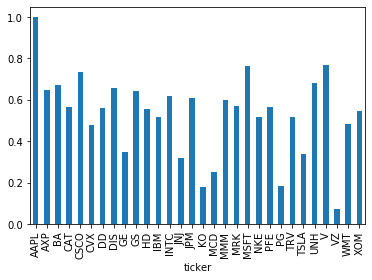

In [27]:
df.corr()['AAPL'].plot(kind='bar')

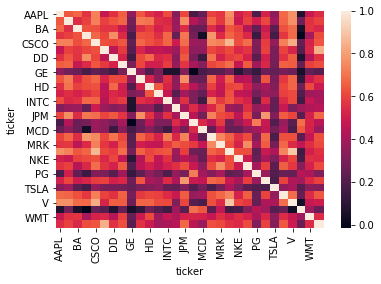

In [28]:
sns.heatmap(df.corr())

### portfolio variance

### $$\sigma^2(R_p) = w_1w_1\sigma^2(R_1) + w_1w_2COV(R_1,R_2) + w_2w_2\sigma^2(R_2) + w_2w_1COV(R_1,R_2)$$
$$\sigma^2(R_p) = \sum_{i=1}^n\sum_{j=1}^nw_iw_jCOV(R_i, R_j)$$

In [29]:
prices = quandl.get_table('SHARADAR/SEP', ticker=['AAPL', 'NKE'], date={'gte':'2000-01-01', 'lte':'2018-12-31'}, paginate=True)

In [30]:
pivoted = prices.pivot_table(index = 'date', columns = 'ticker', values = 'close')
pivoted

ticker,AAPL,NKE
date,,
2018-09-04,57.090,79.60
2018-09-05,56.718,79.92
2018-09-06,55.775,80.40
2018-09-07,55.325,80.30
2018-09-10,54.583,82.10
...,...,...
2018-12-24,36.708,68.10
2018-12-26,39.292,73.01
2018-12-27,39.038,73.67


In [31]:
cov_matrix = pivoted.apply(lambda x: np.log(1+x)).cov()
cov_matrix

ticker,AAPL,NKE
ticker,,
AAPL,0.016705,0.005572
NKE,0.005572,0.003539


In [32]:
w = {'AAPL' : 0.75, 'NKE' : 0.25}


In [33]:
cov_matrix.mul(w, axis = 0)

ticker,AAPL,NKE
ticker,,
AAPL,0.012529,0.004179
NKE,0.001393,0.000885


In [34]:
p_var = cov_matrix.mul(w, axis = 0).mul(w, axis = 1).sum().sum()
p_var

0.011707347152152138

In [35]:
p_sd = np.sqrt(p_var)
p_sd

0.10820049515668649

In [36]:
annual_p_sd = p_sd * np.sqrt(250)
annual_p_sd

1.710800043265733

#### portfolio std with corr() function

###$$p(R_i,R_j) = \frac{COV(R_i, R_j)}{\sigma_i \sigma_j}$$
$$COV(R_i,R_j) = p(R_i,R_j)\sigma_i\sigma_j$$
Portfolio Variance
$$\sigma^2(R_p) = w_1^2\sigma^2(R_1) + w_2^2\sigma^2(R_2) + 2w_1w_2p(R_i,R_j)\sigma_i \sigma_j$$

In [37]:
stds = df.std()
stds.head()

ticker
AAPL    0.023511
AXP     0.016707
BA      0.022535
CAT     0.024850
CSCO    0.019582
dtype: float64

In [39]:
corr = df.corr()
corr.head()

ticker,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,TSLA,UNH,V,VZ,WMT,XOM
ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.646050,0.673559,0.564697,0.734032,0.477432,0.560824,0.656185,0.349175,0.642378,...,0.515257,0.566835,0.185964,0.518954,0.339018,0.680676,0.769815,0.071469,0.483077,0.545166
AXP,0.646050,1.000000,0.551432,0.597585,0.727301,0.594679,0.638189,0.668141,0.288262,0.717048,...,0.485469,0.591275,0.505663,0.610617,0.383275,0.669714,0.768425,0.277343,0.560661,0.598855
BA,0.673559,0.551432,1.000000,0.632049,0.623420,0.571308,0.564364,0.481870,0.261337,0.549282,...,0.591256,0.439183,0.241142,0.493570,0.223962,0.629390,0.685727,0.054878,0.565699,0.534062
CAT,0.564697,0.597585,0.632049,1.000000,0.671673,0.604852,0.760665,0.539799,0.180346,0.627769,...,0.612187,0.537021,0.140192,0.529514,0.168254,0.574218,0.680412,-0.015947,0.402268,0.621743
CSCO,0.734032,0.727301,0.623420,0.671673,1.000000,0.623564,0.608477,0.640439,0.240179,0.671347,...,0.626173,0.688074,0.315397,0.585791,0.358886,0.727611,0.834053,0.253643,0.521875,0.637274


In [40]:
aapl_nke_corr = df['AAPL'].corr(df['NKE'])
aapl_nke_corr

0.5152571429900105

In [41]:
p_var = w['AAPL']**2*stds['AAPL']**2 + w['NKE']**2*stds['NKE']**2 + 2*w['AAPL']*w['NKE']*aapl_nke_corr*stds['AAPL']*stds['NKE']
p_var

0.0004407844452065827

In [42]:
p_sd = np.sqrt(p_var)
p_sd

0.02099486711571623

In [43]:
ann_p_sd = p_sd * np.sqrt(250)
ann_p_sd

0.33195799629116585

### expected return

In [84]:
pivoted

ticker,AAPL,NKE
date,,
2018-09-04,57.090,79.60
2018-09-05,56.718,79.92
2018-09-06,55.775,80.40
2018-09-07,55.325,80.30
2018-09-10,54.583,82.10
...,...,...
2018-12-24,36.708,68.10
2018-12-26,39.292,73.01
2018-12-27,39.038,73.67


In [98]:
exp_r = pivoted.resample('M').last().pct_change().mean()
exp_r

ticker
AAPL   -0.110407
NKE    -0.042079
dtype: float64

In [99]:
exp_r_p = exp_r['AAPL'] * w['AAPL'] + exp_r['NKE'] * w['NKE']
exp_r_p

-0.0933250025963739

### Efficient frontier

In [119]:
cov_matrix = pivoted.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

ticker,AAPL,NKE
ticker,,
AAPL,0.000553,0.000266
NKE,0.000266,0.000482


In [115]:
sd = pivoted.pct_change().apply(lambda x: np.log(1+x)).std()
sd

ticker
AAPL    0.023511
NKE     0.021951
dtype: float64

In [116]:
assets = pd.concat([exp_r,sd],axis = 1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
ticker,,
AAPL,-0.110407,0.023511
NKE,-0.042079,0.021951


In [145]:
p_ret = []
p_vol = []
p_weights = []
num_portfolios = 1

In [146]:
for i in range(num_portfolios):
    weights = [0.75, 0.25]
    p_weights.append(weights)
    returns = np.dot(weights, exp_r)
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis = 0).mul(weights, axis = 1).sum().sum()
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(30)
    p_vol.append(ann_sd)

In [147]:
data = {'Returns' : p_ret, 'Volatility': p_vol}

In [148]:
portfolios = pd.DataFrame(data)
portfolios.index = ['portfolio 1']
portfolios

,Returns,Volatility
portfolio 1,-0.093325,0.114994


In [149]:
op_space = pd.concat([assets,portfolios],axis = 0)
op_space

,Returns,Volatility
AAPL,-0.110407,0.023511
NKE,-0.042079,0.021951
portfolio 1,-0.093325,0.114994


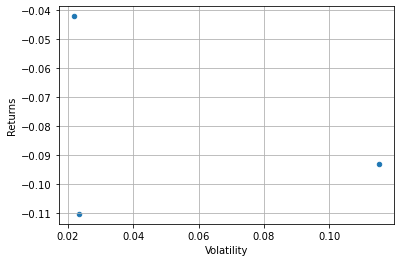

In [151]:
op_space.plot.scatter(x= 'Volatility', y = 'Returns',grid = True)

#### efficient frontier for 3 assets and and 1000 op_space

In [196]:
prices = quandl.get_table('SHARADAR/SEP', ticker=['AAPL', 'KO', 'NKE'], date={'gte':'2000-01-01', 'lte':'2018-12-31'}, paginate=True)

In [197]:
pivoted = prices.pivot(index='date', columns='ticker', values='close')
pivoted.head()

ticker,AAPL,KO,NKE
date,,,
2018-09-04,57.090,44.76,79.60
2018-09-05,56.718,45.38,79.92
2018-09-06,55.775,45.77,80.40
2018-09-07,55.325,45.72,80.30
2018-09-10,54.583,46.06,82.10


In [198]:
cov_matrix = pivoted.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

ticker,AAPL,KO,NKE
ticker,,,
AAPL,0.000553,0.000044,0.000266
KO,0.000044,0.000113,0.000088
NKE,0.000266,0.000088,0.000482


In [199]:
e_r = pivoted.pct_change().mean()
e_r

ticker
AAPL   -0.004285
KO      0.000751
NKE    -0.000639
dtype: float64

In [200]:
sd = pivoted.pct_change().apply(lambda x: np.log(1+x)).std()
sd

ticker
AAPL    0.023511
KO      0.010649
NKE     0.021951
dtype: float64

In [201]:
assets = pd.concat([e_r, sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
ticker,,
AAPL,-0.004285,0.023511
KO,0.000751,0.010649
NKE,-0.000639,0.021951


In [202]:
p_ret = []
p_vol = []
p_weights = []

num_assets = len(pivoted.columns)
num_portfolios = 1000

In [203]:
for portfolio in range(num_portfolios):
    #weights = [.25, .75]
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, e_r)
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    ann_sd = sd
    p_vol.append(ann_sd)


In [204]:
data = {'Returns':p_ret, 'Volatility':p_vol}

In [205]:
for counter, symbol in enumerate(pivoted.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [206]:
portfolios  = pd.DataFrame(data)
portfolios.head()

,Returns,Volatility,AAPL weight,KO weight,NKE weight
0,-0.002153,0.015126,0.567837,0.400722,0.031441
1,-0.001321,0.012478,0.405615,0.573206,0.021178
2,-0.001208,0.018776,0.192267,0.095224,0.712509
3,0.000651,0.010527,0.015012,0.967344,0.017644
4,-0.000679,0.014704,0.149760,0.363900,0.486339


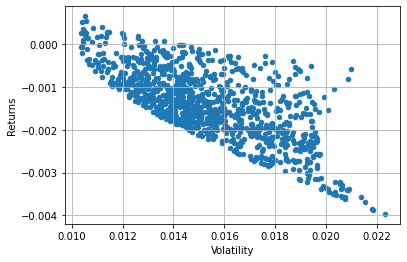

In [207]:
portfolios.plot.scatter(x='Volatility', y='Returns', grid=True)